# PR曲线

绘制每个类别的PR曲线，计算AP值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='cmb10') # 中文字体

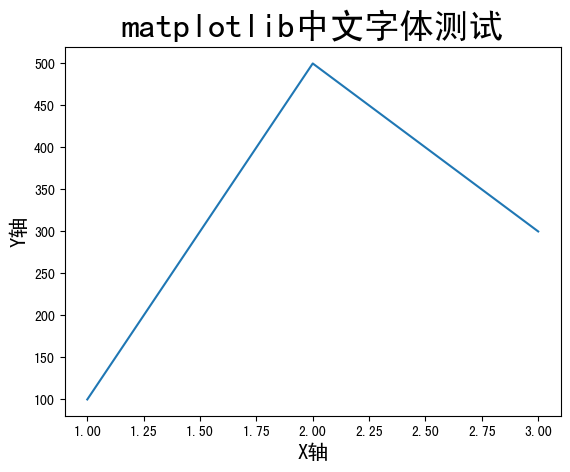

In [3]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [5]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['云', '仓鼠', '兔子', '兰花', '割草机', '向日葵', '城堡', '大海', '大象', '女人', '女孩', '小婴儿', '山', '巴士', '平原', '床', '恐龙', '房屋', '拖拉机', '摩天大楼', '摩托车', '时钟', '有轨电车', '杯子', '松树', '松鼠', '枫树', '柳树', '桌子', '桥', '梨', '棕榈树', '森林', '椅子', '橘子', '橡树', '比目鱼', '毛虫', '水族馆鱼类', '水濑', '沙发', '浣熊', '海狸', '海豚', '海豹', '海龟', '火箭', '火车', '灯', '熊', '牛', '狐狸', '狮子', '狼', '玫瑰', '瓶子', '甜椒', '甲虫', '电视', '电话', '男人', '男孩', '皮卡', '盘子', '碗', '箱子', '罂粟', '老虎', '老鼠', '自行车', '臭鼬', '苹果', '蘑菇', '蛇', '蜗牛', '蜘蛛', '蜜蜂', '蜥蜴', '蝴蝶', '螃蟹', '蟑螂', '蠕虫', '衣柜', '袋鼠', '豪猪', '豹', '负鼠', '郁金香', '金属罐', '键盘', '马路', '骆驼', '鲨鱼', '鲸鱼', '鳄鱼', '鳐', '鳟鱼', '黑猩猩', '鼩鼱', '龙虾']


## 载入测试集预测结果表格

In [6]:
df = pd.read_csv('测试集预测结果.csv')

In [7]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,马路-预测置信度,骆驼-预测置信度,鲨鱼-预测置信度,鲸鱼-预测置信度,鳄鱼-预测置信度,鳐-预测置信度,鳟鱼-预测置信度,黑猩猩-预测置信度,鼩鼱-预测置信度,龙虾-预测置信度
0,D:\dataset\c100sp\val\云\1.jpg,0,云,0,云,7,大海,32,森林,True,...,0.000068,0.000006,1.006844e-07,0.000021,1.959424e-08,3.383883e-08,5.247110e-09,1.189157e-10,8.070859e-08,7.478248e-08
1,D:\dataset\c100sp\val\云\104.jpg,0,云,0,云,14,平原,7,大海,True,...,0.005304,0.000730,1.049881e-05,0.000230,3.995917e-05,1.474082e-06,3.261636e-05,7.850291e-07,1.024485e-05,4.813013e-07
2,D:\dataset\c100sp\val\云\114.jpg,0,云,0,云,24,松树,35,橡树,True,...,0.031279,0.000470,8.852244e-06,0.000064,8.390662e-06,2.718433e-06,1.127651e-05,5.401724e-08,5.945326e-06,2.524639e-06
3,D:\dataset\c100sp\val\云\117.jpg,0,云,12,山,47,火车,32,森林,False,...,0.006685,0.000650,1.045570e-04,0.004611,2.452151e-04,6.439446e-05,1.660972e-05,4.157347e-06,9.510479e-04,5.049789e-06
4,D:\dataset\c100sp\val\云\119.jpg,0,云,0,云,7,大海,31,棕榈树,True,...,0.000078,0.000107,8.889958e-07,0.000042,1.415598e-06,4.487404e-05,8.486018e-08,2.322634e-09,2.091912e-06,1.663505e-06


## 绘制某一类别的PR曲线

In [14]:
specific_class = '水濑'

In [15]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [16]:
# 二分类预测置信度
y_score = df['水濑-预测置信度']

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
AP = average_precision_score(y_test, y_score, average='weighted')

In [18]:
AP

0.4853374628451811

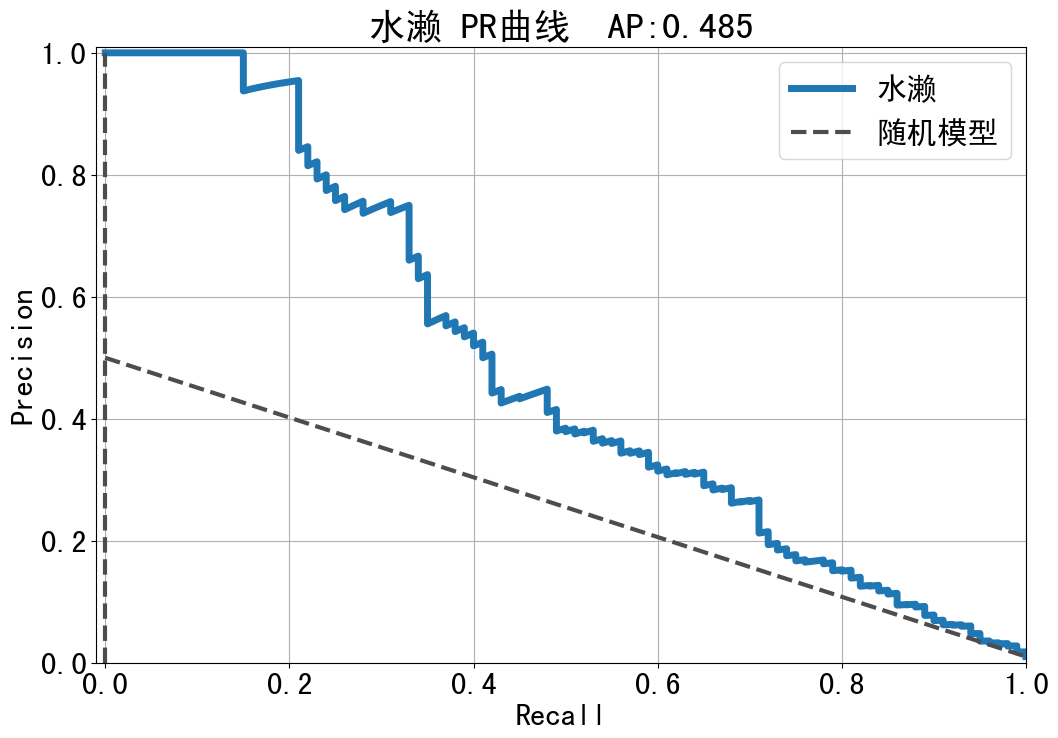

In [19]:
plt.figure(figsize=(12, 8))
# 绘制 PR 曲线
plt.plot(recall, precision, linewidth=5, label=specific_class)

# 随机二分类模型
# 阈值小，所有样本都被预测为正类，recall为1，precision为正样本百分比
# 阈值大，所有样本都被预测为负类，recall为0，precision波动较大
plt.plot([0, 0], [0, 1], ls="--", c='.3', linewidth=3, label='随机模型')
plt.plot([0, 1], [0.5, sum(y_test==1)/len(df)], ls="--", c='.3', linewidth=3)

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} PR曲线  AP:{:.3f}'.format(specific_class, AP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.savefig('{}-PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 绘制所有类别的ROC曲线

In [20]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [21]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [22]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

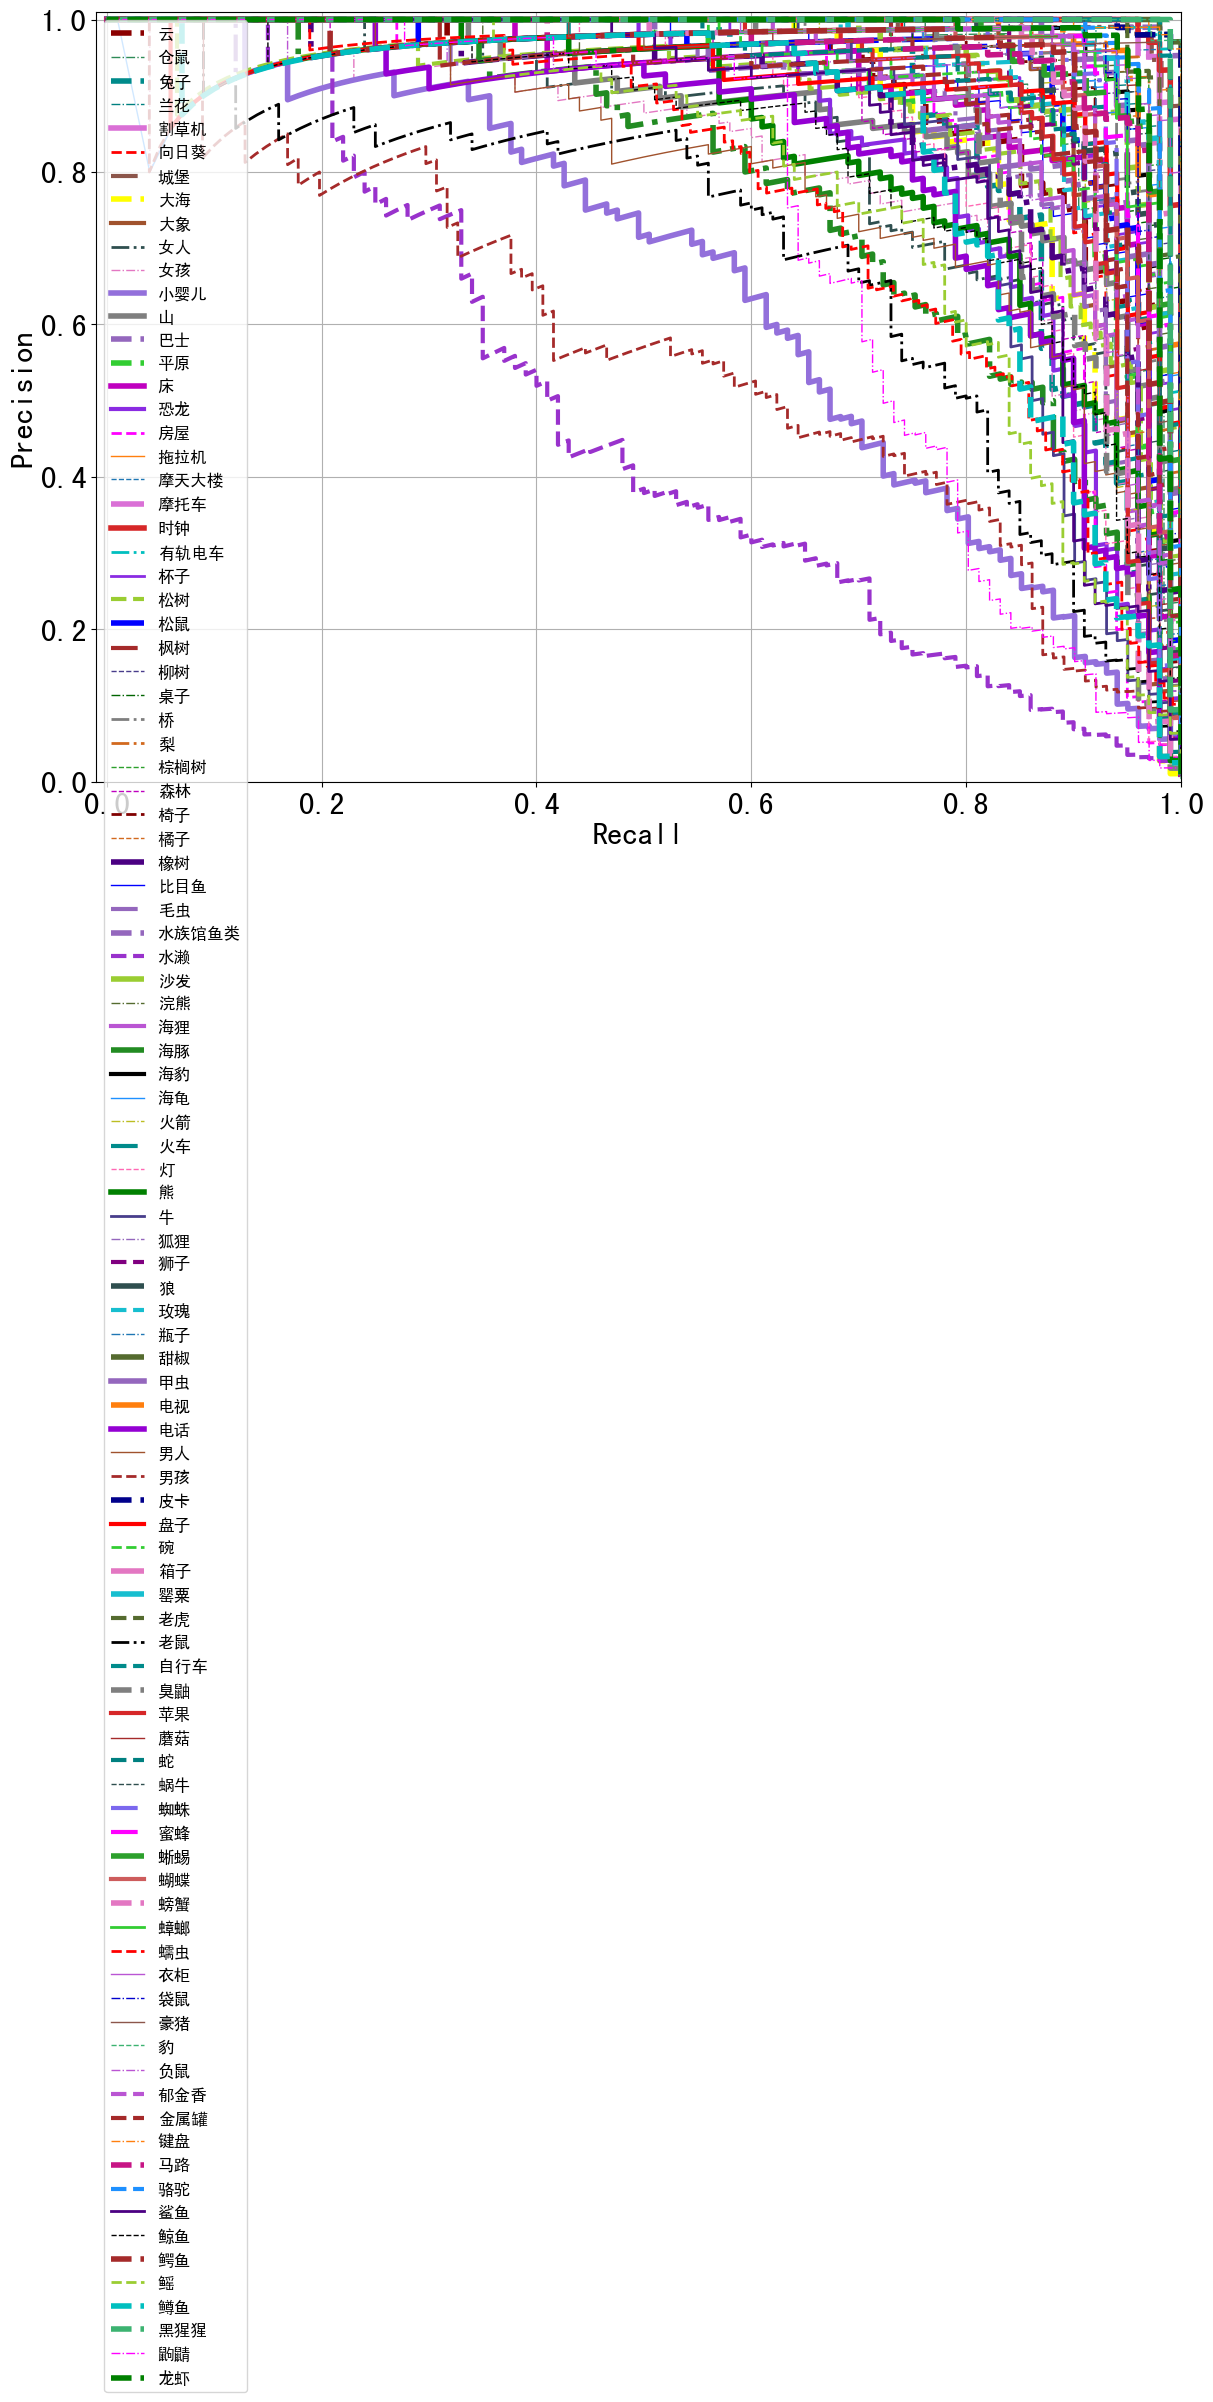

In [23]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
# plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['font.size'] = 22
plt.grid(True)

ap_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    AP = average_precision_score(y_test, y_score, average='weighted')
    plt.plot(recall, precision, **get_line_arg(), label=each_class)
    plt.legend()
    ap_list.append(AP)

plt.legend(loc='best', fontsize=12)
plt.savefig('各类别PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AP增加至`各类别准确率评估指标`表格中

In [20]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [21]:
df_report

,类别,precision,recall,f1-score,support,accuracy
0,云,0.880000,0.871287,0.875622,101.0,0.871287
1,仓鼠,0.739726,0.857143,0.794118,63.0,0.857143
2,兔子,0.844444,0.760000,0.800000,100.0,0.760000
3,兰花,0.889908,0.960396,0.923810,101.0,0.960396
4,割草机,0.906542,0.970000,0.937198,100.0,0.970000
...,...,...,...,...,...,...
97,黑猩猩,0.951456,0.980000,0.965517,100.0,0.980000
98,鼩鼱,0.715789,0.673267,0.693878,101.0,0.673267
99,龙虾,0.904255,0.841584,0.871795,101.0,0.841584
100,macro avg,0.841190,0.840937,0.839961,9978.0,0.840937


In [22]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(ap_list)
weighted_avg_auc = sum(ap_list * df_report.iloc[:-2]['support'] / len(df))

In [23]:
ap_list.append(macro_avg_auc)
ap_list.append(weighted_avg_auc)

In [24]:
df_report['AP'] = ap_list

In [25]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,云,0.880000,0.871287,0.875622,101.0,0.871287,0.921206
1,仓鼠,0.739726,0.857143,0.794118,63.0,0.857143,0.887441
2,兔子,0.844444,0.760000,0.800000,100.0,0.760000,0.851877
3,兰花,0.889908,0.960396,0.923810,101.0,0.960396,0.981510
4,割草机,0.906542,0.970000,0.937198,100.0,0.970000,0.987802
...,...,...,...,...,...,...,...
97,黑猩猩,0.951456,0.980000,0.965517,100.0,0.980000,0.988685
98,鼩鼱,0.715789,0.673267,0.693878,101.0,0.673267,0.738410
99,龙虾,0.904255,0.841584,0.871795,101.0,0.841584,0.950772
100,macro avg,0.841190,0.840937,0.839961,9978.0,0.840937,0.898458


In [26]:
df_report.to_csv('各类别准确率评估指标.csv', encoding='utf_8_sig',index=False)